In [1]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

## Data Visualisation

* Location of Stations in San Franciso Bay Area
* Plotting of longitude and latitude with respect to the GeoMap data using GeoPandas

In [6]:
path_station = r'station.csv'
path_status = r'status.csv'
path_trip = r'trip.csv'
path_weather = r'weather.csv'
map_file=r'map.png'

df_station = pd.read_csv(path_station,index_col=None)
#df_status = pd.read_csv(path_status,index_col=None)


#display(df_station.head(2))
#display(df_status.head(2))
#display(df_trip.head(2))
#display(df_weather.head(2))

In [7]:
df_station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [12]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df_station['lat'], df_station['long'])]
geo_df=gpd.GeoDataFrame(df_station, crs=crs, geometry=geometry)
rh_m=plt.imread(map_file)

In [57]:
geo_df.head()

,id,name,lat,long,dock_count,city,installation_date,geometry
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,POINT (37.330 -121.902)
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013,POINT (37.331 -121.889)
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013,POINT (37.334 -121.895)
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013,POINT (37.331 -121.893)
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013,POINT (37.337 -121.894)


In [63]:
BBox = ((geo_df.long.min(), geo_df.long.max(),      
         geo_df.lat.min(), geo_df.lat.max()))

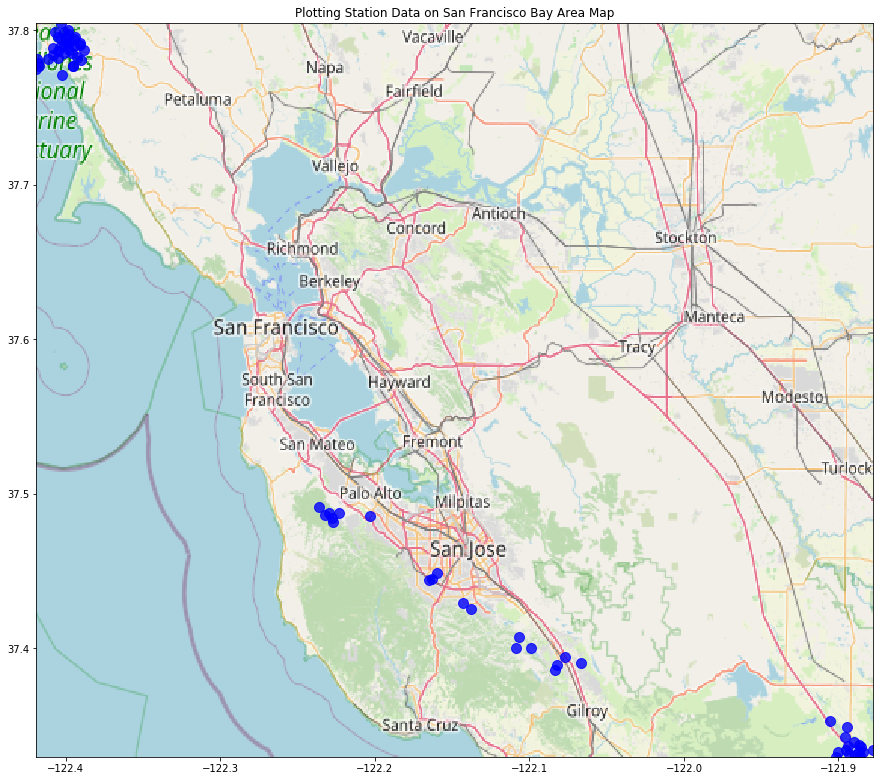

In [69]:
fig, ax=plt.subplots(figsize=(15,15))
ax.scatter(df_station['long'],df_station['lat'],zorder=1, alpha=0.8, c='blue', s=100)
ax.set_title('Plotting Station Data on San Francisco Bay Area Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(rh_m, zorder=0, extent = BBox, aspect= 'equal')

## Data Preparation 
* Summarisation of Trip and Weather data

In [2]:
def summarise_data(trip_in, trip_out):
    """
    This function takes trip information and outputs a new data file with
    a condensed summary of major trip information. The
    trip_in and station_data arguments will be lists of data files for
    the trip and station information, respectively, while trip_out
    specifies the location to which the summarized data will be written.
    """
    with open(trip_out, 'w') as f_out:
        # set up csv writer object        
        out_colnames = ['duration', 'date', 'start_year',
                        'start_month', 'start_hour', 'weekday',
                        'start_city', 'end_city', 'subscription_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        for data_file in trip_in:
            with open(data_file, 'r') as f_in:
                # set up csv reader object
                trip_reader = csv.DictReader(f_in)

                # collect data from and process each row
                for row in trip_reader:
                    new_point = {}
                    
                    ### Convert durations from seconds to minutes.     ###
                    new_point['duration'] = float(row['duration'])/60 
                    
                    # reformat datestrings into multiple columns                
                    trip_date = datetime.strptime(row['start_date'], '%m/%d/%Y %H:%M')
                    new_point['date']  = trip_date.strftime('%Y-%m-%d')
                    new_point['start_year']  = trip_date.strftime('%Y')
                    new_point['start_month'] = trip_date.strftime('%m')
                    new_point['start_hour']  = trip_date.strftime('%H')
                    new_point['weekday']     = trip_date.strftime('%A')
                    
                    # remap start and end terminal with start and end city
                    new_point['start_city'] = row['start_station_name']
                    new_point['end_city'] = row['end_station_name']
                    new_point['subscription_type'] = row['subscription_type']
                
                    # write the processed information to the output file.
                    trip_writer.writerow(new_point)

In [5]:
df_weather = pd.read_csv(path_weather,index_col=None)
df_weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [8]:
path_station = r'station.csv'
path_status = r'status.csv'
path_trip = r'trip.csv'
path_weather = r'weather.csv'

df_trip = pd.read_csv(path_trip,index_col=None)
df_weather = pd.read_csv(path_weather,index_col=None)

## Create sample data
trip_in = ['trip.csv']
trip_out = 'trip_summary.csv'
summarise_data(trip_in, trip_out)

# Load in the data file and print out the first few rows
trip_data = pd.read_csv(trip_out)

trip_data.index = pd.to_datetime(trip_data["date"], format='%Y-%m-%d')


df_weather.index = pd.to_datetime(df_weather["date"], format='%m/%d/%Y')
df_weather_sample = df_weather[['mean_temperature_f', 'mean_humidity','mean_visibility_miles','mean_wind_speed_mph',
                         'zip_code']]

#display(trip_data.shape)
#display(df_weather.shape)

# Merge weather and trip data
sample_data = trip_data.merge(df_weather_sample, left_index=True, right_index=True, how='inner')

display(sample_data.shape)
display(sample_data.head())

(3349795, 14)

,duration,date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type,mean_temperature_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,zip_code
date,,,,,,,,,,,,,,
2013-08-29,1.05,2013-08-29,2013,8,14,Thursday,South Van Ness at Market,South Van Ness at Market,Subscriber,68.0,75.0,10.0,11.0,94107
2013-08-29,1.05,2013-08-29,2013,8,14,Thursday,South Van Ness at Market,South Van Ness at Market,Subscriber,71.0,79.0,10.0,6.0,94063
2013-08-29,1.05,2013-08-29,2013,8,14,Thursday,South Van Ness at Market,South Van Ness at Market,Subscriber,71.0,71.0,10.0,8.0,94301
2013-08-29,1.05,2013-08-29,2013,8,14,Thursday,South Van Ness at Market,South Van Ness at Market,Subscriber,70.0,72.0,10.0,5.0,94041
2013-08-29,1.05,2013-08-29,2013,8,14,Thursday,South Van Ness at Market,South Van Ness at Market,Subscriber,72.0,69.0,10.0,7.0,95113


In [9]:
sample_data.describe()

,duration,start_year,start_month,start_hour,mean_temperature_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,zip_code
count,3.349795e+06,3.349795e+06,3.349795e+06,3.349795e+06,3.347384e+06,3.308976e+06,3.335561e+06,3.349363e+06,3.349795e+06
mean,1.846583e+01,2.014213e+03,6.476844e+00,1.309612e+01,6.213249e+01,6.676808e+01,9.878739e+00,6.025384e+00,9.432500e+04
std,3.709237e+02,6.838566e-01,3.276796e+00,4.554507e+00,6.962303e+00,1.083429e+01,1.436823e+00,3.257576e+00,4.045601e+02
min,1.000000e+00,2.013000e+03,1.000000e+00,0.000000e+00,3.800000e+01,2.400000e+01,4.000000e+00,0.000000e+00,9.404100e+04
25%,5.733333e+00,2.014000e+03,4.000000e+00,9.000000e+00,5.700000e+01,6.100000e+01,1.000000e+01,4.000000e+00,9.406300e+04
50%,8.616667e+00,2.014000e+03,7.000000e+00,1.300000e+01,6.200000e+01,6.800000e+01,1.000000e+01,6.000000e+00,9.410700e+04
75%,1.258333e+01,2.015000e+03,9.000000e+00,1.700000e+01,6.800000e+01,7.300000e+01,1.000000e+01,8.000000e+00,9.430100e+04
max,2.878400e+05,2.015000e+03,1.200000e+01,2.300000e+01,8.400000e+01,9.600000e+01,2.000000e+01,2.300000e+01,9.511300e+04


## 1. Trip Duration Statistics

In [17]:
# Compute statistics for trip durations.
duration_mean = sample_data['duration'].mean()
duration_qtiles = sample_data['duration'].quantile([.25, .5, .75]).tolist()

In [18]:
print('The average duration of trips is {:.2f} minutes.'.format(duration_mean))
print('The median trip duration is {:.2f} minutes.'.format(duration_qtiles[1]))
print('25% of trips are shorter than {:.2f} minutes.'.format(duration_qtiles[0]))
print('25% of trips are longer than {:.2f} minutes.'.format(duration_qtiles[2]))


The average duration of trips is 18.47 minutes.
The median trip duration is 8.62 minutes.
25% of trips are shorter than 5.73 minutes.
25% of trips are longer than 12.58 minutes.


## 2. Frequency of trips per subscription type

In [76]:
df_freq=pd.DataFrame(sample_data['subscription_type'].value_counts())


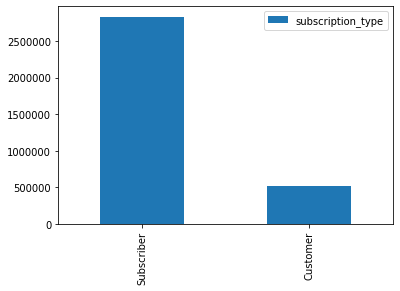

In [80]:
df_freq.plot.bar()

In [77]:
df_freq['type']=df_freq.index

In [78]:
df_freq.rename(columns={'type':'subscription_type', 'subscription_type':"trip_freq"})

,trip_freq,subscription_type
Subscriber,2833730,Subscriber
Customer,516065,Customer


In [85]:
sample_data[sample_data['subscription_type']=='Customer']

,duration,date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type,mean_temperature_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,zip_code
date,,,,,,,,,,,,,,
2013-08-29,2.683333,2013-08-29,2013,8,10,Thursday,Beale at Market,Steuart at Market,Customer,68.0,75.0,10.0,11.0,94107
2013-08-29,2.683333,2013-08-29,2013,8,10,Thursday,Beale at Market,Steuart at Market,Customer,71.0,79.0,10.0,6.0,94063
2013-08-29,2.683333,2013-08-29,2013,8,10,Thursday,Beale at Market,Steuart at Market,Customer,71.0,71.0,10.0,8.0,94301
2013-08-29,2.683333,2013-08-29,2013,8,10,Thursday,Beale at Market,Steuart at Market,Customer,70.0,72.0,10.0,5.0,94041
2013-08-29,2.683333,2013-08-29,2013,8,10,Thursday,Beale at Market,Steuart at Market,Customer,72.0,69.0,10.0,7.0,95113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-31,15.133333,2015-08-31,2015,8,0,Monday,5th at Howard,Embarcadero at Sansome,Customer,69.0,67.0,10.0,9.0,94107
2015-08-31,15.133333,2015-08-31,2015,8,0,Monday,5th at Howard,Embarcadero at Sansome,Customer,71.0,67.0,10.0,4.0,94063
2015-08-31,15.133333,2015-08-31,2015,8,0,Monday,5th at Howard,Embarcadero at Sansome,Customer,70.0,64.0,17.0,8.0,94301


In [96]:
def filter_data(data, condition):
    """
    Remove elements that do not match the condition provided.
    Takes a data list as input and returns a filtered list.
    Conditions should be a list of strings of the following format:
      '<field> <op> <value>'
    where the following operations are valid: >, <, >=, <=, ==, !=
    
    Example: ["duration < 15", "start_city == 'San Francisco'"]
    """

    # Only want to split on first two spaces separating field from operator and
    # operator from value: spaces within value should be retained.
    field, op, value = condition.split(" ", 2)
    
    # check if field is valid
    if field not in data.columns.values :
        raise Exception("'{}' is not a feature of the dataframe. Did you spell something wrong?".format(field))

    # convert value into number or strip excess quotes if string
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")

    # get booleans for filtering
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else: # catch invalid operation codes
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")
    
    # filter data and outcomes
    data = data[matches].reset_index(drop = True)
    return data


In [97]:
def usage_plot(data, key = '', filters = [], **kwargs):
    """
    Plot number of trips, given a feature of interest and any number of filters
    (including no filters). Function takes a number of optional arguments for
    plotting data on continuously-valued variables:
      - n_bins: number of bars (default = 10)
      - bin_width: width of each bar (default divides the range of the data by
        number of bins). "n_bins" and "bin_width" cannot be used simultaneously.
      - boundary: specifies where one of the bar edges will be placed; other
        bar edges will be placed around that value (may result in an additional
        bar being plotted). Can be used with "n_bins" and "bin_width".
    """
    
    # Check that the key exists
    if not key:
        raise Exception("No key has been provided. Make sure you provide a variable on which to plot the data.")
    if key not in data.columns.values :
        raise Exception("'{}' is not a feature of the dataframe. Did you spell something wrong?".format(key))

    # Apply filters to data
    for condition in filters:
        data = filter_data(data, condition)

    # Create plotting figure
    plt.figure(figsize=(8,6))

    if isinstance(data[key][0] , str): # Categorical features
        # For strings, collect unique strings and then count number of
        # outcomes for survival and non-survival.
        
        # Summarize dataframe to get counts in each group
        data['count'] = 1
        data = data.groupby(key, as_index = False).count()
        
        levels = data[key].unique()
        n_levels = len(levels)
        bar_width = 0.8
        
        for i in range(n_levels):
            trips_bar = plt.bar(i - bar_width/2, data.loc[i]['count'], width = bar_width)
        
        # add labels to ticks for each group of bars.
        plt.xticks(range(n_levels), levels)
        
    else: # Numeric features
        # For numbers, divide the range of data into bins and count
        # number of outcomes for survival and non-survival in each bin.
        
        # Set up bin boundaries for plotting
        if kwargs and 'n_bins' in kwargs and 'bin_width' in kwargs:
            raise Exception("Arguments 'n_bins' and 'bin_width' cannot be used simultaneously.")

        min_value = data[key].min()
        max_value = data[key].max()
        value_range = max_value - min_value
        n_bins = 10
        bin_width = float(value_range) / n_bins

        if kwargs and 'n_bins' in kwargs:
            n_bins = int(kwargs['n_bins'])
            bin_width = float(value_range) / n_bins
        elif kwargs and 'bin_width' in kwargs:
            bin_width = kwargs['bin_width']
            n_bins = int(np.ceil(float(value_range) / bin_width))
        
        if kwargs and 'boundary' in kwargs:
            bound_factor = np.floor(( min_value - kwargs['boundary'] ) / bin_width)
            min_value = kwargs['boundary'] + bound_factor * bin_width
            if min_value + n_bins * bin_width <= max_value:
                n_bins += 1

        bins = [i*bin_width + min_value for i in range(n_bins+1)]
        
        # plot the data
        plt.hist(data[key], bins = bins)

    # Common attributes for plot formatting
    key_name = ' '.join([x.capitalize() for x in key.split('_')])
    plt.xlabel(key_name)
    plt.ylabel("Number of Trips")
    plt.title("Number of Trips by {:s}".format(key_name))
    plt.show()


## 3. Number of trips by a Customer in less than 60 minutes

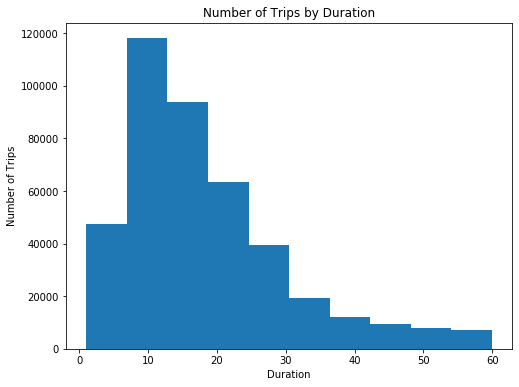

In [104]:
usage_plot(sample_data[sample_data['subscription_type']=="Customer"], 'duration', ['duration < 60'])

## 4. Number of trips by a Subscriber in less than 60 minutes

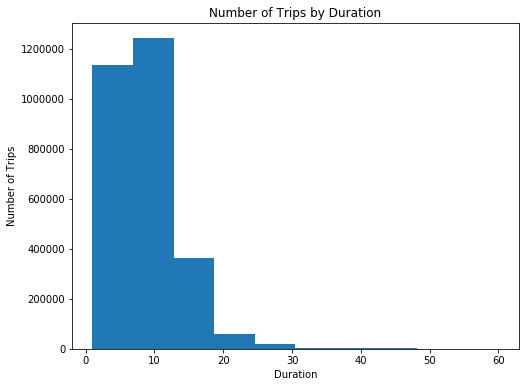

In [105]:
usage_plot(sample_data[sample_data['subscription_type']=="Subscriber"], 'duration', ['duration < 60'])